In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [90]:
data = pd.read_csv('../animal-predictions/Data_prep/Louisville_Animal_Cleaned.csv')

In [91]:
data.head()

,intype,insubtype,surreason,outtype,animaltype,sex,bites,petsize,color,breed,mixed,breed2,days_in,in_season,out_season
0,STRAY,OTC,STRAY,RTO,DOG,F,N,MED,TAN / BLACK,ENG BULLDOG,True,Unknown,3,SPRING,SPRING
1,STRAY,OTC,STRAY,ADOPTION,CAT,N,N,LARGE,ORG TABBY,DOMESTIC SH,False,NM,5,SPRING,SPRING
2,STRAY,OTC,STRAY,FOSTER,DOG,S,N,MED,CHOCOLATE / WHITE,PIT BULL,False,NM,26,SPRING,SPRING
3,STRAY,OTC,STRAY,ADOPTION,DOG,N,Y,PUPPY,TAN,PIT BULL,True,Unknown,13,SPRING,SPRING
4,STRAY,OTC,STRAY,EUTH,DOG,M,Y,MED,BL BRINDLE,PIT BULL,False,NM,9,SUMMER,SUMMER


In [92]:
data.columns

Index(['intype', 'insubtype', 'surreason', 'outtype', 'animaltype', 'sex',
       'bites', 'petsize', 'color', 'breed', 'mixed', 'breed2', 'days_in',
       'in_season', 'out_season'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41963 entries, 0 to 41962
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   intype      41963 non-null  object
 1   insubtype   41963 non-null  object
 2   surreason   41963 non-null  object
 3   outtype     41963 non-null  object
 4   animaltype  41963 non-null  object
 5   sex         41963 non-null  object
 6   bites       41963 non-null  object
 7   petsize     41963 non-null  object
 8   color       41963 non-null  object
 9   breed       41963 non-null  object
 10  mixed       41963 non-null  bool  
 11  breed2      41963 non-null  object
 12  days_in     41963 non-null  int64 
 13  in_season   41963 non-null  object
 14  out_season  41963 non-null  object
dtypes: bool(1), int64(1), object(13)
memory usage: 4.5+ MB


In [94]:
#drop nulls
data = data.dropna()

In [96]:
#save columns names in a list
cols = data.columns.tolist()
#drop columns that are not needed
cols.remove('outtype')

In [97]:
data['outtype'].value_counts()

ADOPTION     12164
FOSTER        6188
RTO           5510
SNR           5238
TRANSFER      3635
EUTH          2719
TNR           2139
LOST EXP      1259
DISPOSAL       886
RTF            783
FOUND EXP      540
TRANSPORT      484
DIED           368
RELEASE         25
LOST            25
Name: outtype, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cols:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

In [100]:
label_encoder_outtype = LabelEncoder()
data['outtype'] = label_encoder_outtype.fit_transform(data['outtype'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41963 entries, 0 to 41962
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   intype      41963 non-null  object
 1   insubtype   41963 non-null  object
 2   surreason   41963 non-null  object
 3   outtype     41963 non-null  object
 4   animaltype  41963 non-null  object
 5   sex         41963 non-null  object
 6   bites       41963 non-null  object
 7   petsize     41963 non-null  object
 8   color       41963 non-null  object
 9   breed       41963 non-null  object
 10  mixed       41963 non-null  bool  
 11  breed2      41963 non-null  object
 12  days_in     41963 non-null  int64 
 13  in_season   41963 non-null  object
 14  out_season  41963 non-null  object
dtypes: bool(1), int64(1), object(13)
memory usage: 4.5+ MB


In [30]:
data.columns

Index(['intype', 'insubtype', 'surreason', 'outtype', 'animaltype', 'sex',
       'bites', 'petsize', 'color', 'breed', 'mixed', 'breed2', 'days_in',
       'in_season', 'out_season'],
      dtype='object')

### Naive bayes approach -- checking for independence

In [31]:
#test for independence with all variables
from scipy.stats import chi2_contingency
#create a new dataframe to hold the p values
p_values = pd.DataFrame(columns = ['V1', 'V2', 'p_value'])
#loop through all columns
for col in cols:
    for col2 in cols:
        chi2, p, dof, expected = chi2_contingency(pd.crosstab(data[col], data[col2]))
        p_values = pd.concat([p_values, pd.DataFrame({'V1': col, 'V2': col2, 'p_value': p}, index=[0])], ignore_index=True)

In [33]:
#print the p values where p < 0.05
p_values[p_values['p_value'] < 0.05]

,V1,V2,p_value
0,intype,intype,0.000000e+00
1,intype,insubtype,0.000000e+00
2,intype,surreason,0.000000e+00
3,intype,outtype,0.000000e+00
4,intype,animaltype,0.000000e+00
...,...,...,...
220,out_season,mixed,6.065258e-50
221,out_season,breed2,7.865960e-25
222,out_season,days_in,1.463748e-35
223,out_season,in_season,0.000000e+00


### Splitting the data into test and train sets

In [37]:
X = data.drop('outtype', axis=1)  # Features
y = data['outtype']  # Target variable

# Split the dataset into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')

Accuracy of Random Forest Classifier: 0.68


In [38]:
#split data into test and train sets
train, test = train_test_split(data, test_size = 0.3)

In [48]:
#create a contigency table of the train and test data
train_outtype = train.groupby('outtype').size().reset_index(name='train')
test_outtype = test.groupby('outtype').size().reset_index(name='test')
train_test = pd.merge(train_outtype, test_outtype, on='outtype')
train_test

,outtype,train,test
0,0,8547,3617
1,1,251,117
2,2,602,284
3,3,1902,817
4,4,4347,1841
5,5,381,159
6,6,20,5
7,7,896,363
8,8,17,8
9,9,572,211


In [49]:
#perform a chi square test on the train and test data
chi2, p, dof, expected = chi2_contingency(pd.crosstab(train_test['train'], train_test['test']))
print('p-value: {p:.2f}')

p-value: 0.23


#### Create a baseline

In [64]:
data['outtype'].value_counts(normalize=True)

0     0.289874
4     0.147463
10    0.131306
11    0.124824
13    0.086624
3     0.064795
12    0.050973
7     0.030003
2     0.021114
9     0.018659
5     0.012868
14    0.011534
1     0.008770
8     0.000596
6     0.000596
Name: outtype, dtype: float64

## Creating a random forest model

In [50]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

In [51]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [44]:
#make predictions on the test data
y_pred = rf_model.predict(X_test)

In [45]:
#evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy:.2f}')


Accuracy of Decision Tree Classifier: 0.68


In [46]:
#print the feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
days_in,0.222904
color,0.160154
sex,0.085143
petsize,0.084950
breed,0.084075
intype,0.078390
insubtype,0.070055
animaltype,0.051851
surreason,0.050515
out_season,0.035840


In [52]:

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
#make predictions on the test data
y_pred = rf_model.predict(X_test)
#evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy:.2f}')

Accuracy of Random Forest: 0.68


In [53]:
# #create a new dataframe
# accuracies = pd.DataFrame(columns=['type','parameter', 'accuracy'])
# #loop through the different values of n_estimators
# for n in range(1, 100):
#     rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies = pd.concat([accuracies, pd.DataFrame({'type':'n_estimators','parameter': n, 'accuracy': accuracy}, index=[0])], ignore_index=True)
# #loop through the different values of max_depth
# for n in range(1, 100):
#     rf_model = RandomForestClassifier(max_depth=n, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies = pd.concat([accuracies, pd.DataFrame({'type':'max_depth','parameter': n, 'accuracy': accuracy}, index=[0])], ignore_index=True)
# #loop through the different values of min_samples_leaf
# for n in range(1, 100):
#     rf_model = RandomForestClassifier(min_samples_leaf=n, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies = pd.concat([accuracies, pd.DataFrame({'type':'min_samples_leaf','parameter': n, 'accuracy': accuracy}, index=[0])], ignore_index=True)


InvalidParameterError: The 'min_samples_split' parameter of RandomForestClassifier must be an int in the range [2, inf) or a float in the range (0.0, 1.0]. Got 1 instead.

In [56]:
# #loop through the different values of min_samples_split
# for n in range(2,100):
#     rf_model = RandomForestClassifier(min_samples_split=n, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies = pd.concat([accuracies, pd.DataFrame({'type':'min_samples_split','parameter': n, 'accuracy': accuracy}, index=[0])], ignore_index=True)
# #loop through the different values of max_features
# for n in range(1, 100):
#     rf_model = RandomForestClassifier(max_features=n, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies = pd.concat([accuracies, pd.DataFrame({'type':'max_featres','parameter': n, 'accuracy': accuracy}, index=[0])], ignore_index=True)

In [61]:
#sort accuracies by accuracy
accuracies.sort_values('accuracy', ascending=False)

,type,parameter,accuracy
320,min_samples_split,25,0.699154
308,min_samples_split,13,0.699154
309,min_samples_split,14,0.698797
319,min_samples_split,24,0.698677
199,min_samples_leaf,2,0.698082
...,...,...,...
0,n_estimators,1,0.587037
102,max_depth,4,0.575956
101,max_depth,3,0.543786
100,max_depth,2,0.441558


In [60]:
accuracies.sort_values('accuracy', ascending=False).head(30)

,type,parameter,accuracy
320,min_samples_split,25,0.699154
308,min_samples_split,13,0.699154
309,min_samples_split,14,0.698797
319,min_samples_split,24,0.698677
199,min_samples_leaf,2,0.698082
321,min_samples_split,26,0.698082
327,min_samples_split,32,0.697963
312,min_samples_split,17,0.697843
303,min_samples_split,8,0.697486
315,min_samples_split,20,0.697486


In [58]:
accuracies.describe()

,accuracy
count,494.000000
mean,0.674094
std,0.025908
min,0.286072
25%,0.673895
50%,0.677171
75%,0.681699
max,0.699154


In [62]:

rf_model = RandomForestClassifier(min_samples_split=13, random_state=42)
rf_model.fit(X_train, y_train)
#make predictions on the test data
y_pred = rf_model.predict(X_test)
#evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy:.2f}')

Accuracy of Random Forest: 0.70


In [63]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
days_in,0.227685
intype,0.106819
sex,0.098975
petsize,0.089994
insubtype,0.089835
color,0.087075
animaltype,0.073338
breed,0.067614
surreason,0.062206
out_season,0.026086


In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# create the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2112,    0,    1,    9,  123,    0,    0,    0,    0,   12,   10,
         100,    2,   32,    0],
       [   4,   16,    0,   18,    5,    0,    0,    0,    0,    0,    6,
           9,    0,   19,    0],
       [   1,    1,  151,   11,    1,    0,    0,    0,    0,    0,   11,
           0,    0,    1,    0],
       [  67,    5,    1,  331,   20,    0,    0,    0,    0,    5,   53,
          26,    3,   39,    0],
       [ 385,    1,    0,   25,  615,    0,    0,    0,    0,    1,   75,
          67,    3,   78,    0],
       [   0,    0,    0,    0,    0,  103,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   1,    0,    0,    3,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    3,    0],
       [   0,    0,    0,    0,    0,    0,    0,  254,    0,    0,    0,
           0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           1,    1,    0,    0],
       [  39,    0,    0,   15,    5,

In [105]:
#get the labels
labels = label_encoder_outtype.classes_

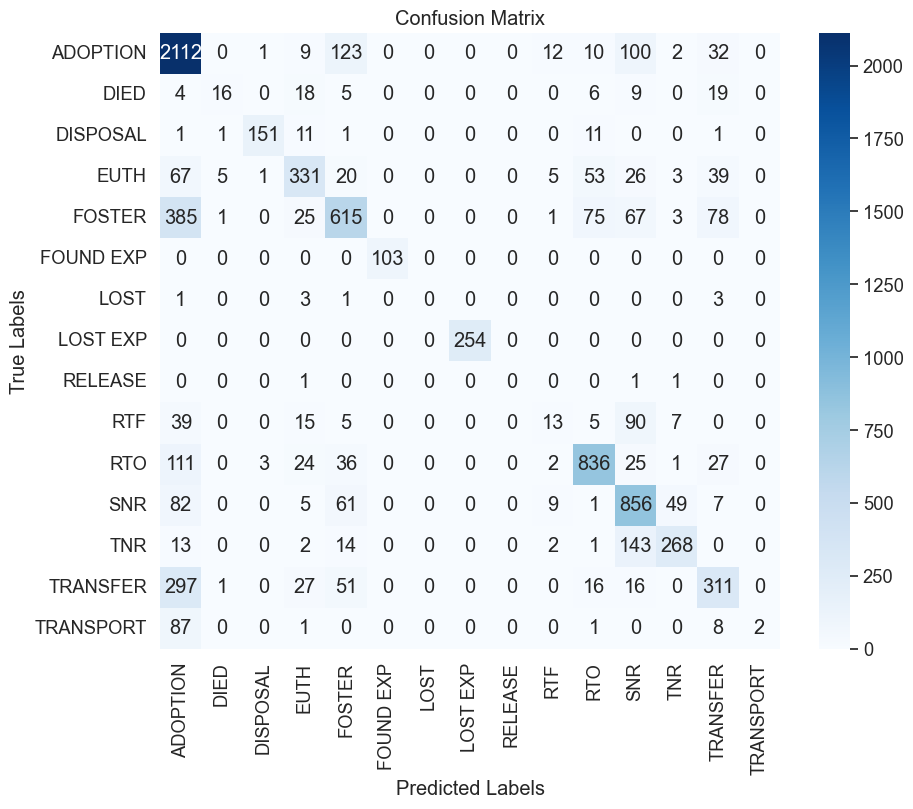

In [114]:
class_labels = labels
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for readability
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [119]:
#from confusion matrix calculate true positive rate
tpr = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0])
print(f'True Positive Rate: {tpr:.2f}')

#from confusion matrix calculate false positive rate
fpr = confusion_matrix[0,1]/(confusion_matrix[0,1]+confusion_matrix[0,0])
print(f'False Positive Rate: {fpr:.2f}')

#calculate false negative rate
fnr = confusion_matrix[1,0]/(confusion_matrix[1,1]+confusion_matrix[1,0])
print(f'False Negative Rate: {fnr:.2f}')


True Positive Rate: 0.80
False Positive Rate: 0.00
False Negative Rate: 0.20


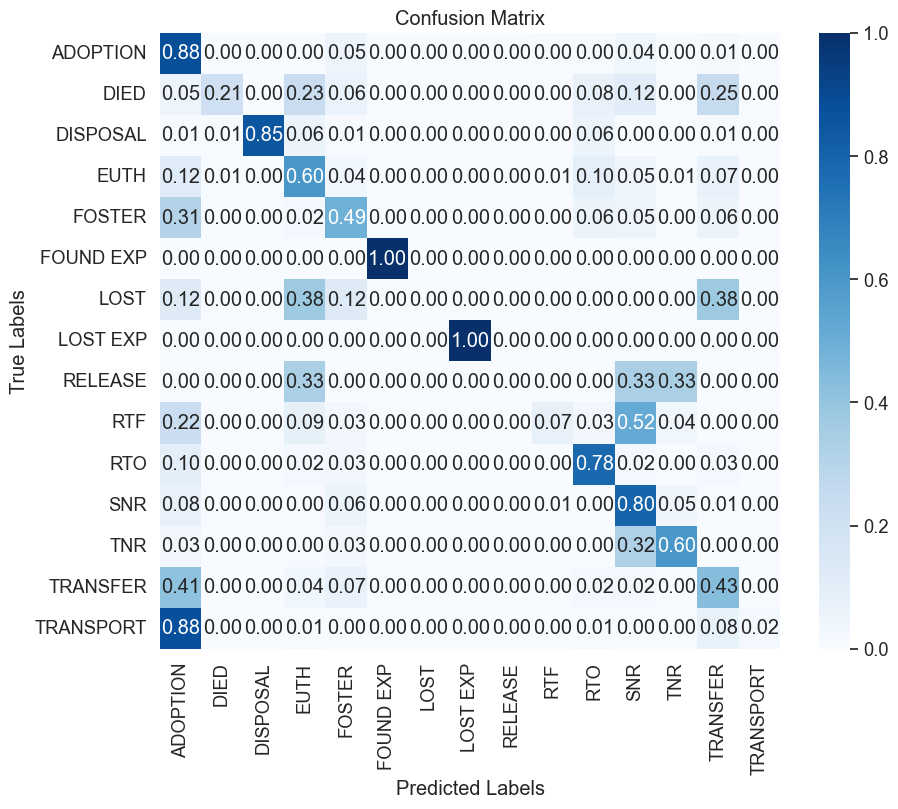

In [123]:
#divide each row of the confusion matrix by the sum of the row
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
confusion_matrix

#plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size for readability
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


